In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Work on the Brooklyn Pedestrian Dataset: https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD

1) Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [38]:
url='https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

In [24]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [37]:
import datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

In [26]:
df['day_of_week'] = df['hour_beginning'].dt.dayofweek

In [27]:
df['day_of_week'] = df['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_of_week
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday


In [28]:
df = df[~df['day_of_week'].isin(['Saturday', 'Sunday'])]
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_of_week
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16051,2018-07-12 00:00:00,Brooklyn Bridge,77,39,38,partly-cloudy-night,72.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
16052,2018-06-22 04:00:00,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday
16053,2018-07-19 06:00:00,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
16055,2018-07-24 18:00:00,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Average Pedestrian Counts by Day of Week')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Average Pedestrian Count')

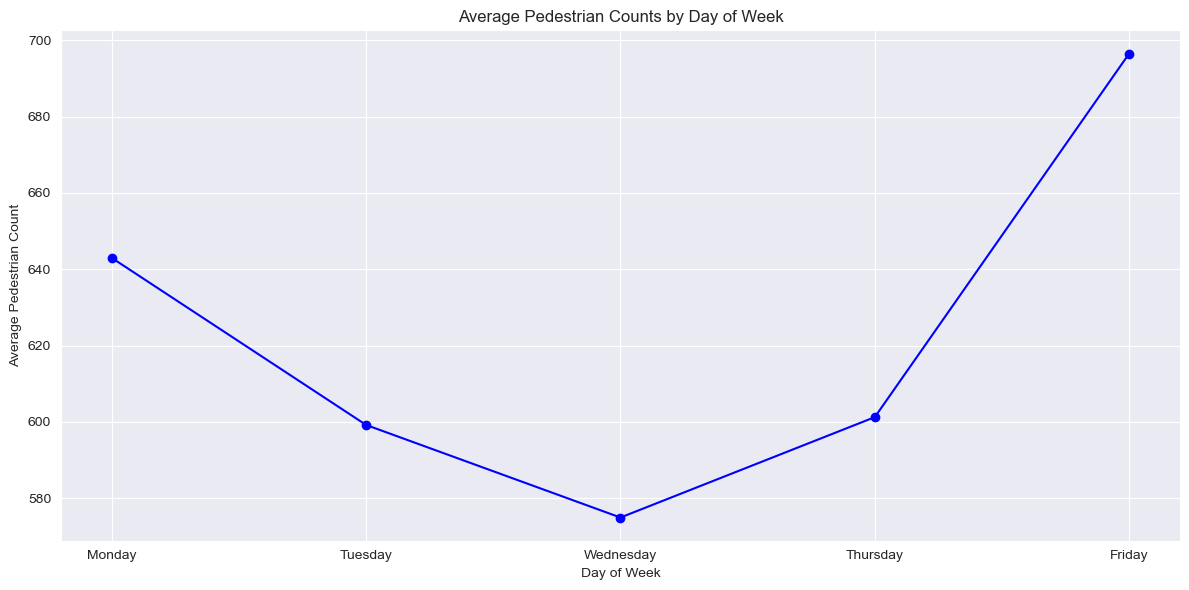

In [29]:
ped_avg = df.groupby('day_of_week')['Pedestrians'].mean()

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
ped_avg = ped_avg.reindex(days)

plt.figure(figsize=(12, 6))
plt.plot(ped_avg.index, ped_avg.values, color='blue', marker='o') 
plt.title('Average Pedestrian Counts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()

2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

In [39]:
url='https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

In [40]:
df2 = df[df['hour_beginning'].dt.year == 2019]
df2

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019-02-10 12:00:00,Brooklyn Bridge,1388,623,765,clear-day,31.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
8757,2019-11-10 08:00:00,Brooklyn Bridge,305,168,137,partly-cloudy-day,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
8758,2019-11-07 01:00:00,Brooklyn Bridge,0,0,0,clear-night,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
8759,2019-04-26 11:00:00,Brooklyn Bridge,1437,613,824,cloudy,55.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [46]:
weather_categories = df2['weather_summary'].unique()
weather_categories

array([nan, 'cloudy', 'clear-night', 'clear-day', 'partly-cloudy-night',
       'partly-cloudy-day', 'fog', 'rain', 'sleet', 'snow', 'wind'],
      dtype=object)

C:\Users\Luoyr\AppData\Local\Temp\ipykernel_20788\2147933910.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_with_dummies.corr().loc['Pedestrians', weather_dummies.columns]


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap between Specific Weather Conditions and Pedestrian Counts')

Text(0.5, 60.3159722222222, 'Pedestrian Counts')

Text(97.72222222222221, 0.5, 'Weather Conditions')

(array([0.5]), [Text(0, 0.5, 'Pedestrians')])

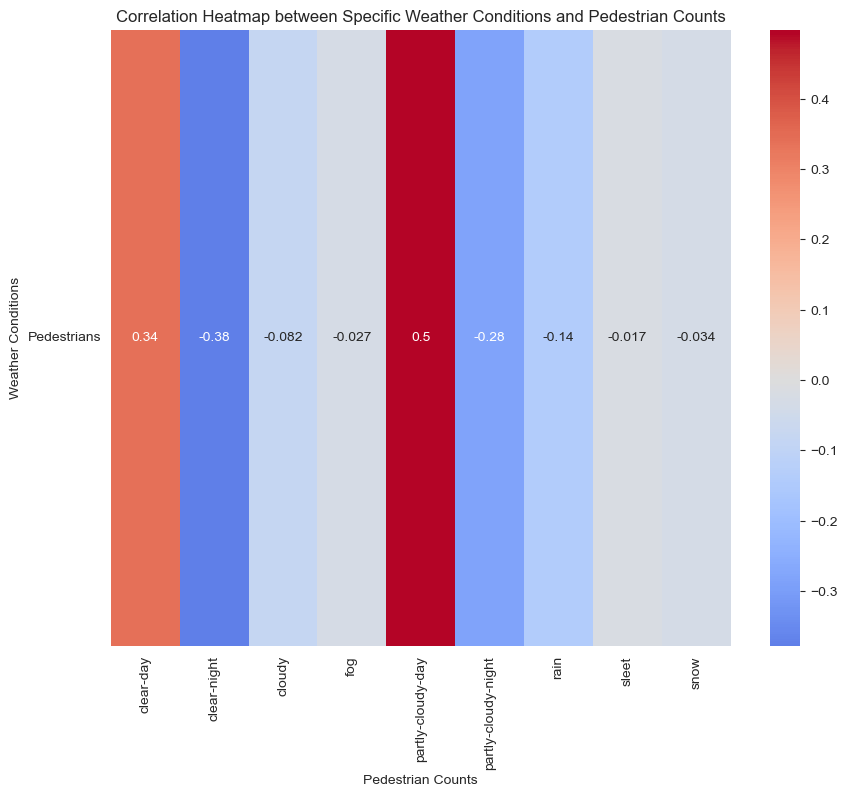

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

weather_types = ['cloudy', 'clear-night', 'clear-day', 'partly-cloudy-night',
                 'partly-cloudy-day', 'fog', 'rain', 'sleet', 'snow']

df_filtered = df2[df2['weather_summary'].isin(weather_types)]

weather_dummies = pd.get_dummies(df_filtered['weather_summary'])

df_with_dummies = pd.concat([df_filtered, weather_dummies], axis=1)

correlation_matrix = df_with_dummies.corr().loc['Pedestrians', weather_dummies.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(correlation_matrix).T, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Specific Weather Conditions and Pedestrian Counts')
plt.xlabel('Pedestrian Counts')
plt.ylabel('Weather Conditions')
plt.yticks(rotation=0)  # Keep the weather condition labels horizontal
plt.show()


3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [50]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weather_summary_code
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",-1
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1


In [54]:
def time_of_day(time):
    if 6 <= time.hour < 12:
        return 'morning'
    elif 12 <= time.hour < 17:
        return 'afternoon'
    elif 17 <= time.hour < 21:
        return 'evening'
    else:
        return 'night'

In [56]:
df['time_of_day'] = df['hour_beginning'].apply(time_of_day)
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weather_summary_code,time_of_day
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",-1,night
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,night
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,night
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,night
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,2018-06-22 04:00:00,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",5,night
16053,2018-07-19 06:00:00,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,morning
16054,2018-06-16 16:00:00,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,afternoon
16055,2018-07-24 18:00:00,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,evening


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='time_of_day', ylabel='Pedestrians'>

Text(0.5, 1.0, 'Pedestrian Counts by Weather Summary')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Pedestrian Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'night'),
  Text(1, 0, 'afternoon'),
  Text(2, 0, 'morning'),
  Text(3, 0, 'evening')])

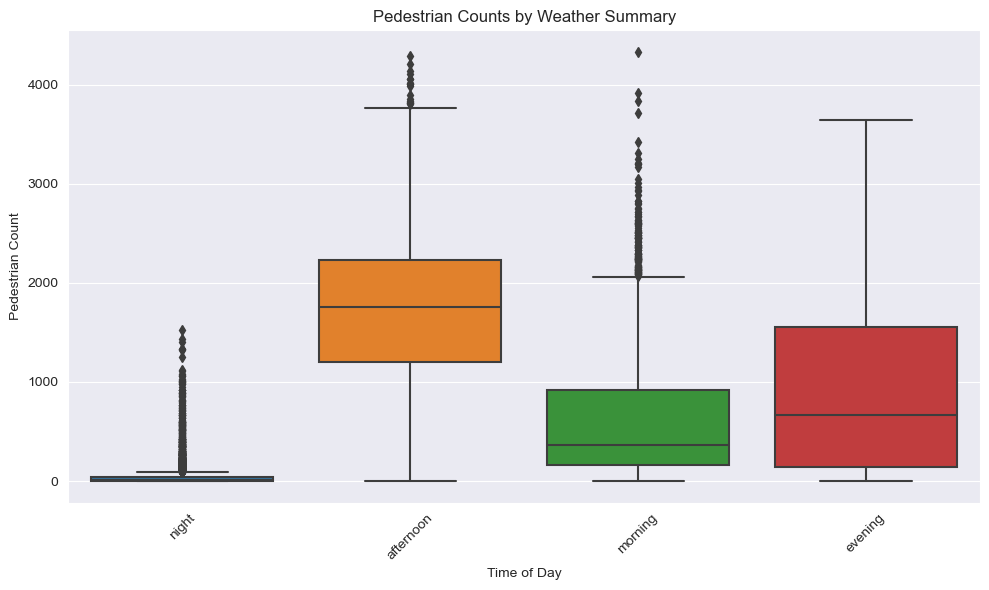

In [57]:
# Analysis 1
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='time_of_day', y='Pedestrians')
plt.title('Pedestrian Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='time_of_day'>

Text(0.5, 1.0, 'Average Pedestrian Counts by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'morning'),
  Text(1, 0, 'afternoon'),
  Text(2, 0, 'evening'),
  Text(3, 0, 'night')])

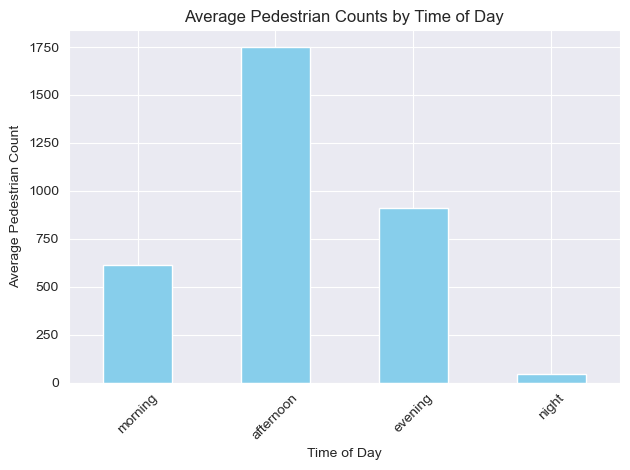

In [58]:
# Analysis 2
pedestrian_counts_by_time = df.groupby('time_of_day')['Pedestrians'].mean()
pedestrian_counts_by_time.reindex(['morning', 'afternoon', 'evening', 'night']).plot(kind='bar', color='skyblue')
plt.title('Average Pedestrian Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

<Axes: xlabel='time_of_day'>

Text(0.5, 1.0, 'Average Pedestrian Counts Towards Manhattan vs. Brooklyn by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'morning'),
  Text(1, 0, 'afternoon'),
  Text(2, 0, 'evening'),
  Text(3, 0, 'night')])

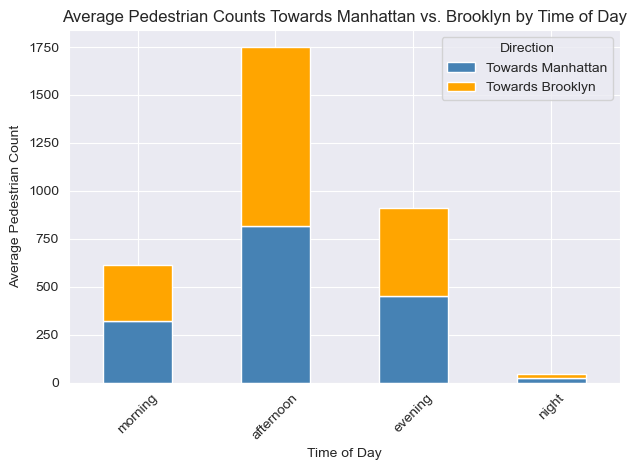

In [60]:
# Analysis 3
toManhattan = df.groupby('time_of_day')['Towards Manhattan'].mean()
toBrooklyn = df.groupby('time_of_day')['Towards Brooklyn'].mean()

time_of_day = pd.DataFrame({
    'Towards Manhattan': toManhattan,
    'Towards Brooklyn': toBrooklyn
})

time_of_day = time_of_day.reindex(['morning', 'afternoon', 'evening', 'night'])

time_of_day.plot(kind='bar', stacked=True, color=['steelblue', 'orange'])
plt.title('Average Pedestrian Counts Towards Manhattan vs. Brooklyn by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()